In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [ ]:
test = pd.read_csv('data/train/Data_S06_Sess04.csv')
feedbacks = test[test['FeedBackEvent'] == 1]
print(len(feedbacks)) # should be 60
print(test.iloc[-1])
#print(test[test['FeedBackEvent'] == 1]['Time'])

60
Time             660.000000
Fp1              433.361027
Fp2              484.222096
AF7              375.057406
AF3              480.741008
AF4              502.918550
AF8              319.675353
F7               406.353950
F5               433.920156
F3               489.771044
F1               404.204640
Fz               502.478582
F2               502.749159
F4               416.306192
F6               436.538305
F8               420.917618
FT7              381.710817
FC5              430.190101
FC3              433.474791
FC1              508.076759
FCz              308.054685
FC2              457.262287
FC4              484.128256
FC6              433.161963
FT8              387.890733
T7               361.086301
C5               422.688934
C3               390.659288
C1               492.658253
Cz               383.439003
C2               515.475540
C4               463.955855
C6               473.106286
T8               388.648704
TP7              355.076305
CP5              

In [ ]:
channels = test.columns[1:-2] # exclude time, eog and feedback columns
print(channels)
print(len(channels))

Index(['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz',
       'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4',
       'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8',
       'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7',
       'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'POz', 'P08',
       'O1', 'O2'],
      dtype='object')
56


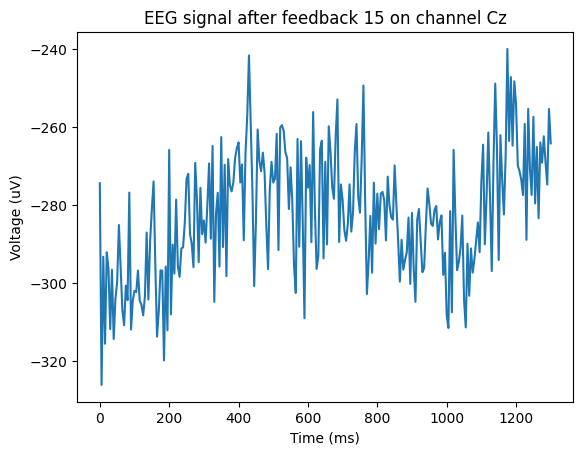

In [ ]:
# Plot 1.3s long EEG after feedback
def plot_eeg_after_feedback(data, feedback_id, channel):
    feedback_times = data[data['FeedBackEvent'] == 1]['Time']
    t = feedback_times.iloc[feedback_id]
    part = data[(data['Time'] >= t) & (data['Time'] <= t + 1.3)]
    time = (part['Time'] - t) * 1000  # time in ms from feedback event
    plt.plot(time, part[channel])
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (uV)')
    plt.title(f'EEG signal after feedback {feedback_id} on channel {channel}')
    plt.show()

plot_eeg_after_feedback(test, 15, 'Cz')


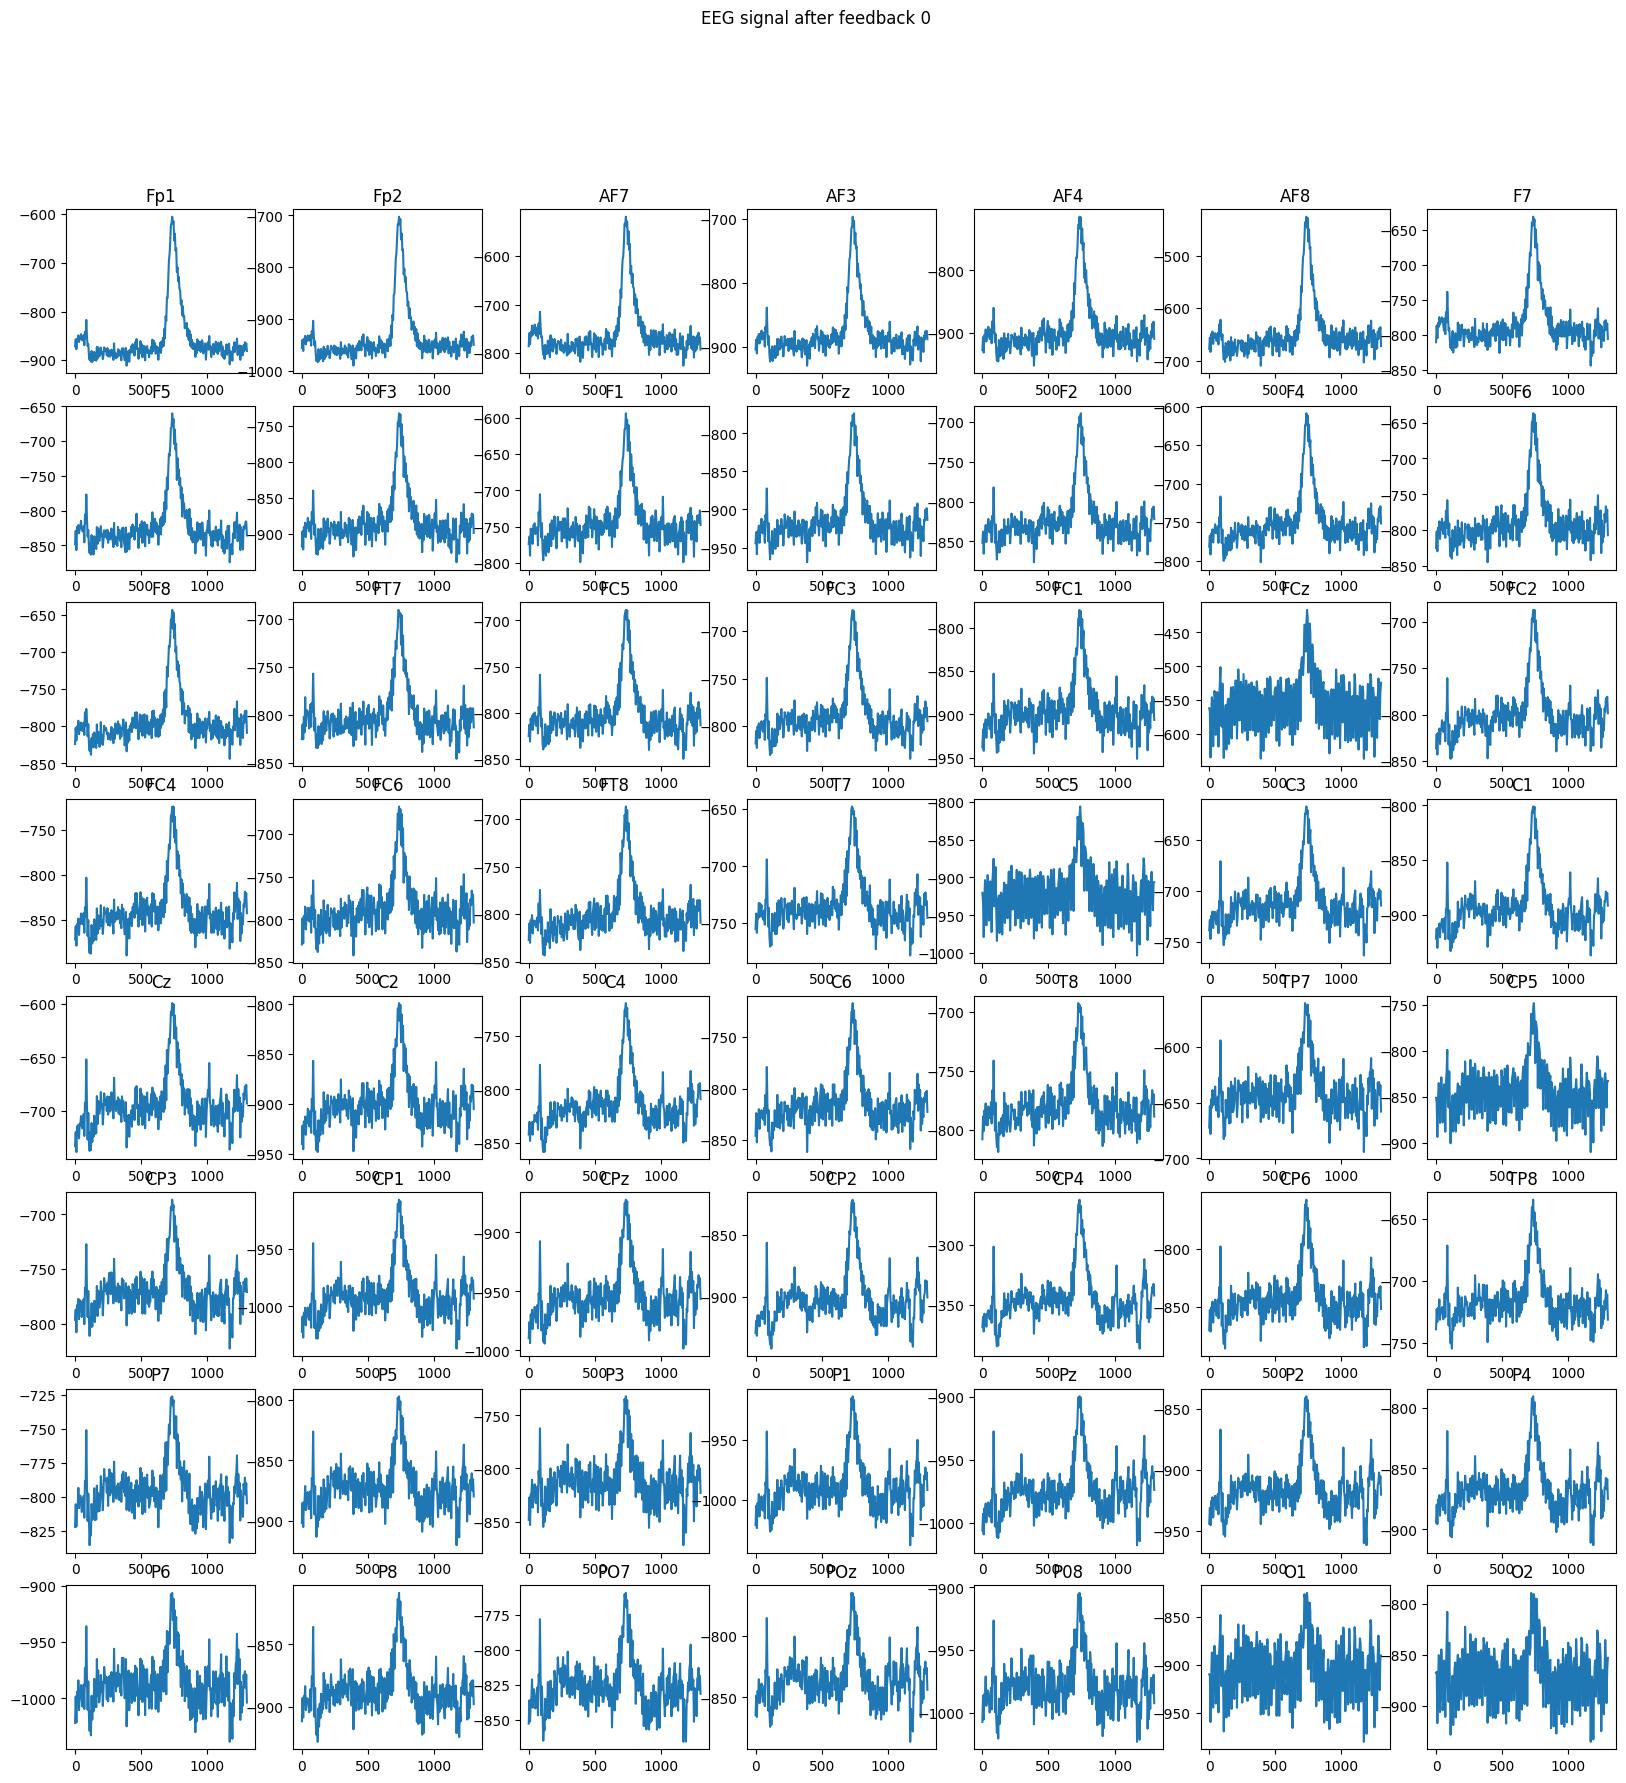

In [45]:
# Plot 1.3s long EEG after feedback for all channels as subplots
def plot_eeg_after_feedback_all_channels(data, feedback_id):
    feedback_times = data[data['FeedBackEvent'] == 1]['Time']
    t = feedback_times.iloc[feedback_id]
    part = data[(data['Time'] >= t) & (data['Time'] <= t + 1.3)]
    time = (part['Time'] - t) * 1000  # time in ms from feedback event
    fig, axs = plt.subplots(8, 7, figsize=(20, 20))
    for i, channel in enumerate(channels):
        row = i // 7
        col = i % 7
        axs[row, col].plot(time, part[channel])
        axs[row, col].set_title(channel)
    plt.suptitle(f'EEG signal after feedback {feedback_id}')
    plt.show()

plot_eeg_after_feedback_all_channels(test, 0)


In [47]:
# Now, filter signals with a 5th order Butterworth bandpass filter with cutoff frequencies 1 and 40 Hz
# bibliography says 1 - 20, 1 - 30, solution of the winner was 1 - 40
fs = 200  # sampling frequency
lowcut = 1
highcut = 40
order = 5
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')

def filter_channel(data, channel):
    return signal.filtfilt(b, a, data[channel])

def get_filtered_data(data):
    filtered_data = data.copy()
    for channel in channels:
        filtered_data[channel] = filter_channel(data, channel)
    return filtered_data

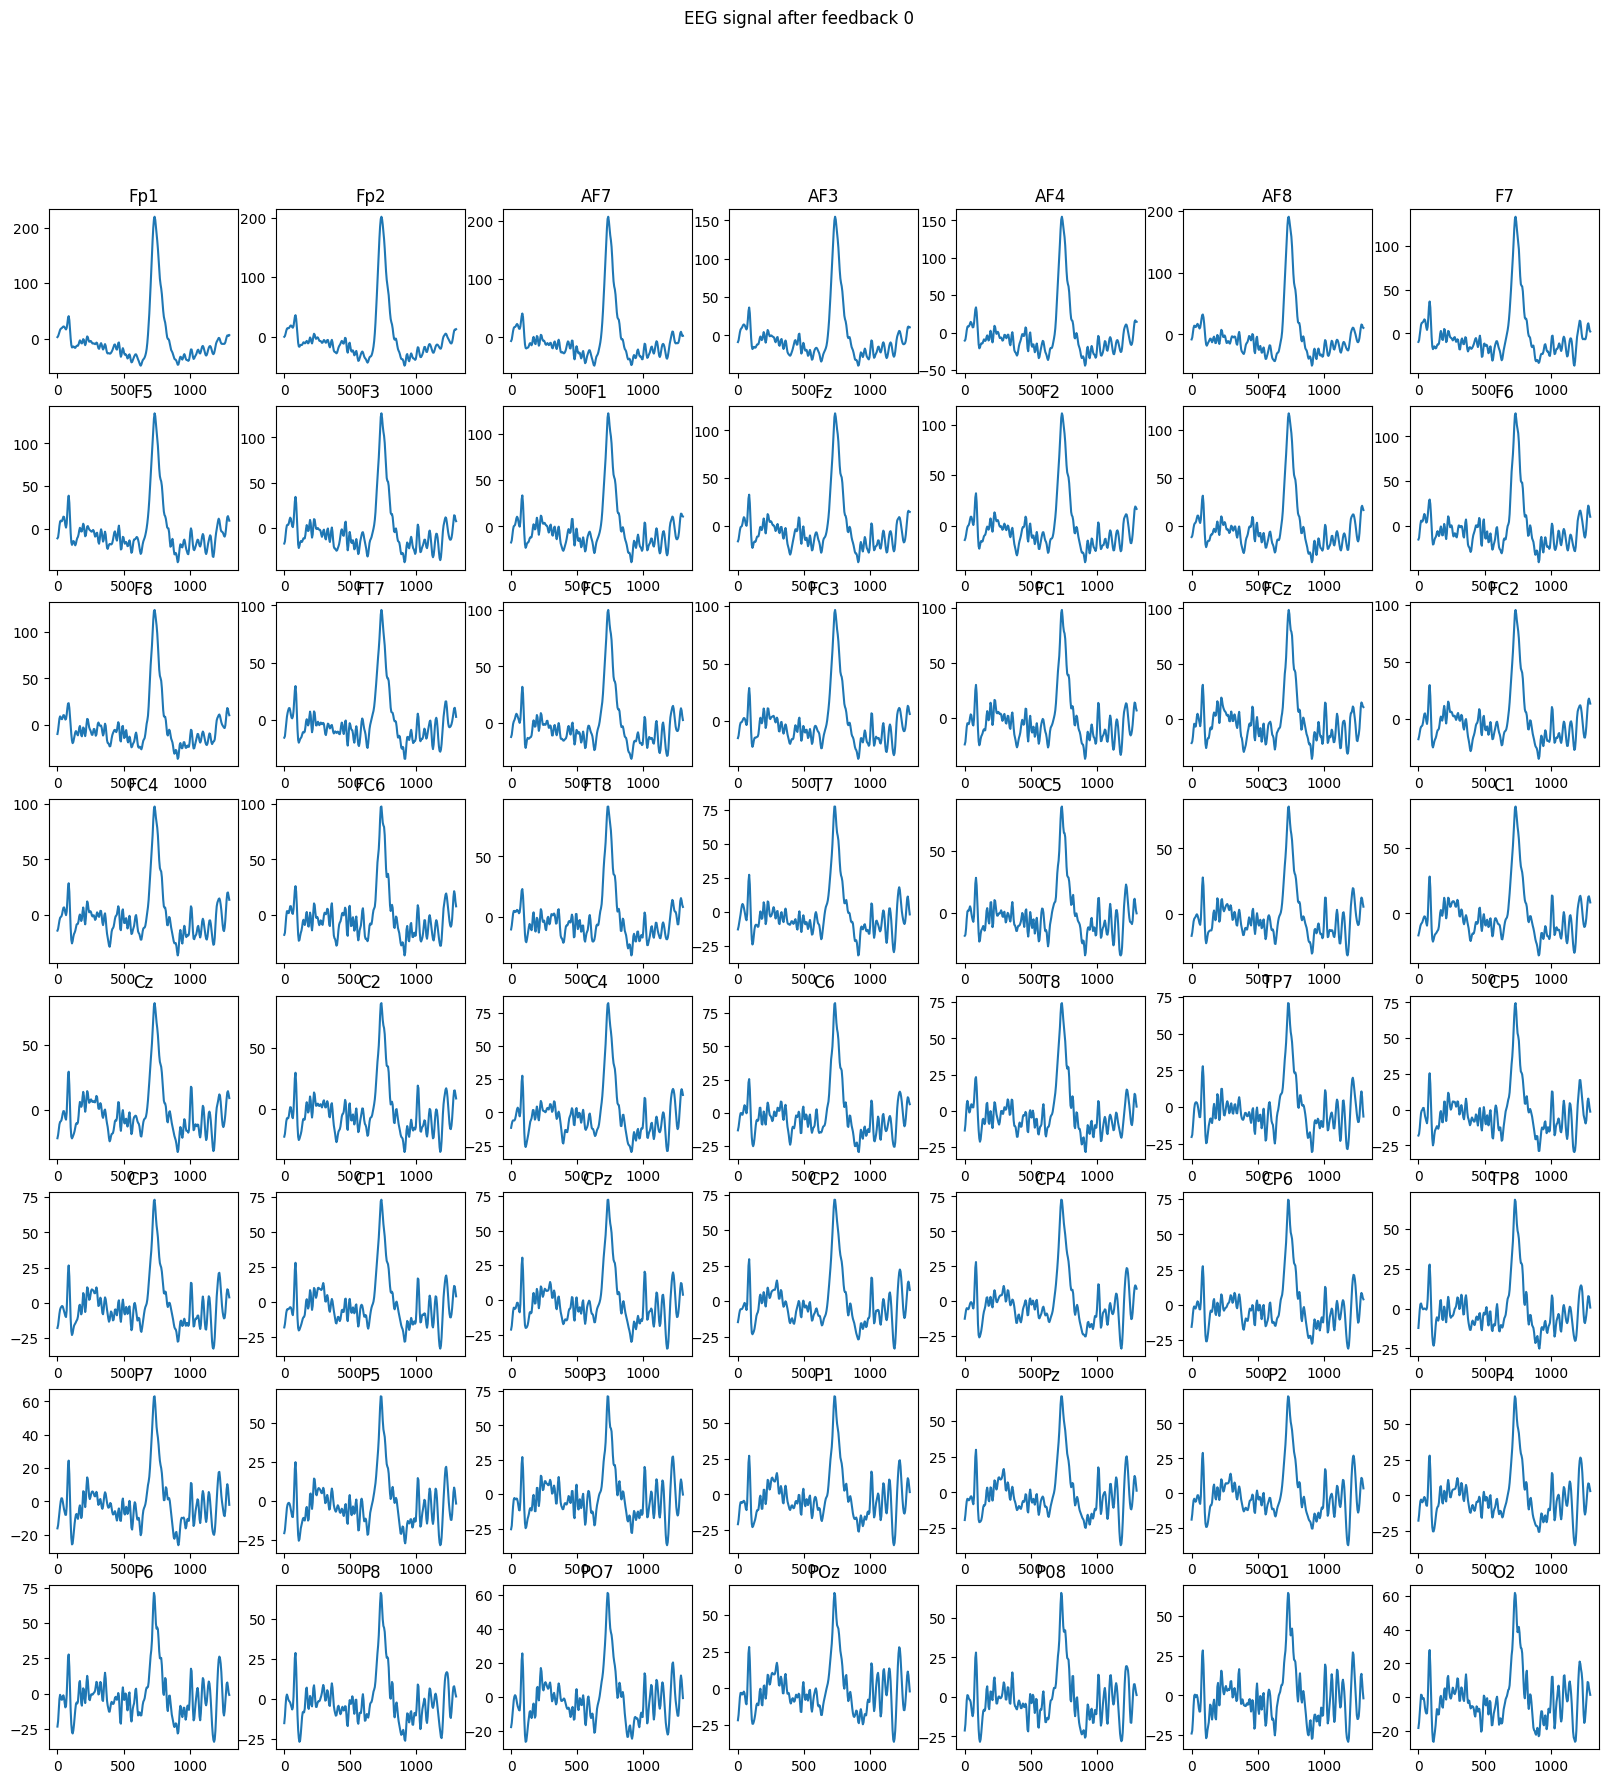

In [53]:
filtered_test = get_filtered_data(test)
plot_eeg_after_feedback_all_channels(filtered_test, 0)